# Numerical Methods: Initial Value Problem

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

## Method 1: Euler's Method

In [2]:
def initialize_all(a,b,y0,h):
    """Given an initial and final time a and b, with y(a)=y0, and step size h,
    return several things.
    X: an array from a to b with n elements, where n is the number of steps from a to b.
    Y: an empty array of size (n, y.size), Y[0]=y0.
    h: the step size.
    n: the number of steps to be taken.
    """
    n = int((b-a)/h+1)
    X = np.linspace(a, b, n)
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X, Y, h, int(n)

In [3]:
def euler(f,X,Y,h,n):
    """Use the Euler method to compute an approximate solution
    to the ODE y' = f(t, y) over X.
    Y[0] = y0
    f is assumed to accept two arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of X.
    """
    y_old = Y[0]
    for i in range(n-1):
        i += 1
        Y[i] = y_old + h*f(X[i-1], y_old)
        y_old = Y[i]        
    return(Y)

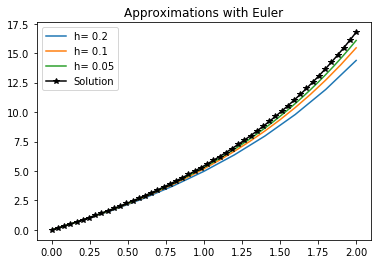

In [4]:
h = [.2, .1, .05]
a = 0
b = 2
y0 = 0
f = lambda x,y: y - 2*x + 4
y_ = lambda y: -2 + 2*y + 2*np.exp(y)
plt.title("Approximations with Euler")
for i in h:
    ZZ = initialize_all(a,b,y0,i)
    Euler_Out = euler(f,ZZ[0],ZZ[1],ZZ[2],ZZ[3])
    plt.plot(ZZ[0], Euler_Out, label= "h= " + str(i))
lista = np.array(list(np.linspace(0,2,50)))
plt.plot(lista, y_(lista), '*-k', label= "Solution")
plt.legend(loc="upper left")
plt.show()

## Midpoint Method & Runge-Kutta

#### Midpoint Method

In [5]:
def midpoint(f,X,Y,h,n):
    for i in range(n-1):
        Y[i+1] = Y[i] + h * f((X[i] + h*.5), (Y[i] + .5*h*f(X[i], Y[i])))
    return(Y)

#### Runge-Kutta (RK4)

In [6]:
def RK4(f,X,Y,h,n):
#    print(np.size(X))
#    print(np.size(Y))
    for i in range(n-1):
        print
        rk1 = np.array(f(X[i], Y[i]))
#        print(rk1)
        rk2 = f(X[i] + h*.5, Y[i] + (h*.5) *rk1)
#        print(rk2)
        rk3 = f(X[i] + h*.5, Y[i] + (h*.5) *rk2)
#        print(rk3)
        rk4 = f(X[i+1], Y[i] + h*rk3)
#        print(rk4)
#        print(rk1,"\n",rk2,"\n",rk3,"\n",rk4,"\n",Y[i])
        Y[i+1] = Y[i] + (h/6) * (rk1 + 2*rk2 + 2*rk3 + rk4)
    return(Y)

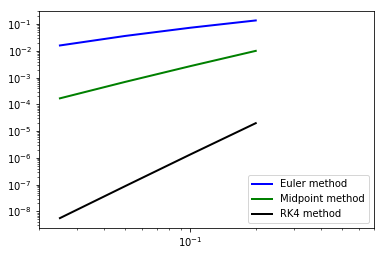

In [7]:
a, b, ya = 0., 2., 0.
def ode_f(x,y):
    return np.array([y - 2*x + 4.])
best_grid = 320 # number of subintervals in most refined grid
h = 2./best_grid
X, Y, h, n = initialize_all(a, b, ya, h)

# Requires an implementation of the euler method
best_eul = euler(ode_f, X, Y, h, n)[-1]
best_mid = midpoint(ode_f, X, Y, h, n)[-1]
best_RK4 = RK4(ode_f, X, Y, h, n)[-1]

smaller_grids = [10, 20, 40, 80] # number of subintervals in smaller grids
h = [2./N for N in smaller_grids]

Euler_sol = [euler(ode_f, initialize_all(a, b, ya, h[i])[0],
            initialize_all(a, b, ya, h[i])[1], h[i], N+1)[-1]
            for i, N in enumerate(smaller_grids)]

Mid_sol = [midpoint(ode_f, initialize_all(a, b, ya, h[i])[0],
            initialize_all(a, b, ya, h[i])[1], h[i], N+1)[-1]
            for i, N in enumerate(smaller_grids)]

RK4_sol = [RK4(ode_f, initialize_all(a, b, ya, h[i])[0],
            initialize_all(a, b, ya, h[i])[1], h[i], N+1)[-1]
            for i, N in enumerate(smaller_grids)]


Euler_error = [abs((val - best_eul)/best_eul) for val in Euler_sol]

Midpoint_error = [abs((val - best_mid)/best_mid) for val in Mid_sol]

RK4_error = [abs((val - best_RK4)/best_RK4) for val in RK4_sol]

plt.loglog(h, Euler_error, '-b', label="Euler method", linewidth=2.)
plt.loglog(h, Midpoint_error, '-g', label="Midpoint method", linewidth=2.)
plt.loglog(h, RK4_error, 'black', label="RK4 method", linewidth=2.)
plt.xlim(.02,0.7)
plt.legend(loc="lower right")
plt.show()

## RK4: Simple Harmonic Oscillator

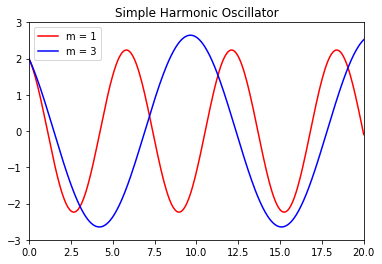

In [8]:
h = .02
a = 0
b = 20
y0 = np.array([2,-1])

m = 1
k = 1
f1 = lambda x,y: np.array([y[1],(-1)*y[0]])

m = 3
k = 1
f2 = lambda x,y: np.array([y[1],(-1./3)*y[0]])

ZZ1 = initialize_all(a,b,y0,i)
returned1 = RK4(f1,ZZ1[0],ZZ1[1],ZZ1[2],ZZ1[3])

ZZ2 = initialize_all(a,b,y0,i)
returned2 = RK4(f2,ZZ2[0],ZZ2[1],ZZ2[2],ZZ2[3])

plt.title("Simple Harmonic Oscillator")
plt.plot(ZZ1[0], returned1[:,0], "r", label="m = 1")
plt.plot(ZZ2[0], returned2[:,0], "b", label="m = 3")
plt.legend(loc="upper left")
plt.xlim(0,20)
plt.ylim(-3,3)

plt.show()

## RK4: Damped Free Harmonic Oscillator

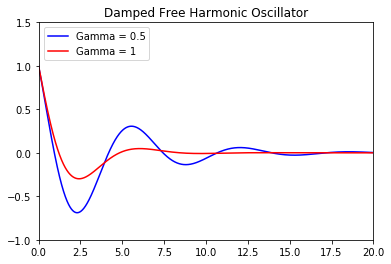

0.00329051613507
2.80836499308e-05


In [9]:
h = .0005
a = 0
b = 20
y0 = np.array([1,-1])

gamma1 = .5
gamma2 = 1
f1 = lambda x,y: np.array([y[1], -gamma1*y[1] - y[0]])
f2 = lambda x,y: np.array([y[1], -gamma2*y[1] - y[0]])

ZZ1 = initialize_all(a,b,y0,h)
returned1 = RK4(f1,ZZ1[0],ZZ1[1],ZZ1[2],ZZ1[3])
firstone = returned1[-1]
ZZ2 = initialize_all(a,b,y0,h)
returned2 = RK4(f2,ZZ2[0],ZZ2[1],ZZ2[2],ZZ2[3])
secondone = returned2[-1]

plt.title("Damped Free Harmonic Oscillator")
plt.plot(ZZ1[0], returned1[:,0], "b", label="Gamma = "+str(gamma1))
plt.plot(ZZ2[0], returned2[:,0], "r", label="Gamma = "+str(gamma2))

plt.legend(loc="upper left")
plt.xlim(0,20)
plt.ylim(-1,1.5)
plt.show()

print(firstone[0])
print(secondone[0])

## RK4: Damped & Forced Harmonic Oscillator

Gamma = 0.5 Omega = 1.5 	 0.61831447055
Gamma = 0.1 Omega = 1.1 	 -6.58510899772
Gamma = 0 Omega = 1 	 12.8232739258


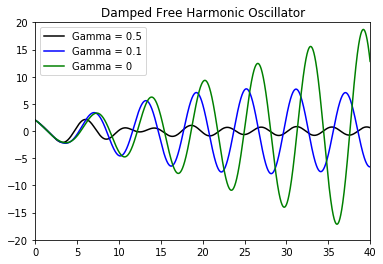

In [10]:
h = .0005
a = 0
b = 40
y0_ = np.array([2,-1])

variable = [[.5,1.5,'k'],[.1,1.1,'b'],[0,1,'g']]
gamma2 = 1

for i in variable:
    
    f1 = lambda x,y: np.array([y[1], -y[0] -.5*i[0]*y[1] + np.cos(i[1]*x) ])
    ZZ1 = initialize_all(a,b,y0_,h)
    returned1 = RK4(f1,ZZ1[0],ZZ1[1],ZZ1[2],ZZ1[3])
    plt.plot(ZZ1[0], returned1[:,0], i[2], label="Gamma = "+str(i[0]))
    print("Gamma = "+str(i[0]),"Omega = "+str(i[1]),"\t",returned1[-1][0])


plt.title("Damped Free Harmonic Oscillator")
plt.legend(loc="upper left")
plt.xlim(0,40)
plt.ylim(-20,20)

plt.show()